## Understanding the business problem

Coronavirus has taken over the world in just few months causing havoc and leading to many distasters related to almost every sector. Along with the economy and physical health our mental health is also changing. Due to the worldwild lockdown and work from home rules our brain and emotionos are experiencing something new. Amidst this lockdown many people are missing their old lifestyle and many are happy to stay at home. 

Pandemic and lockdown both have triggered people to show different views regarding themm and thankfully we are in the age of technology to see the world reacting about the  situation on social media. 
We are trying to find the the reactions of citizens of India due to the pandemic and as well as the lockdowns from their reactions on the twitter.

We can not assume that the whole polulation of India is on twitter and tweeting about the current situation so we will consider this as an analysis on the sample of the population of  India


In [1]:
# Importing necessary libraries
import pandas as pd                  # for handling data and performing functions on them
import numpy as np                   # for mathematical operations
import matplotlib.pyplot as plt      # for visualizing and EDA
import seaborn as sns
import warnings 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

%matplotlib inline
pd.set_option('display.max_colwidth', 100)
#ignoring warnings in the output
warnings.filterwarnings('ignore')

C:\Users\ysanj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# # # # DATA ACQUISITION # # # #
'''
The following CSV file is obtained after scarapping of the data from twitter  using TWEEPY and TWITTER API.

'''

filename = "hashtag_data.csv"
#
data = pd.read_csv(filename)
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.262790e+18,1.262790e+18,1.589910e+12,19-05-2020,16:51:14,UTC,1.250080e+18,dramaflick,The Drama Flick,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1250079805980045318', 'username': 'DramaFlick'}]",NaN,NaN,NaN,NaN
1,1.262790e+18,1.262790e+18,1.589910e+12,19-05-2020,16:50:44,UTC,8.078430e+17,knowpuneet,TravelTrainee,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '807843238648299520', 'username': 'knowpuneet'}]",NaN,NaN,NaN,NaN
2,1.262790e+18,1.262790e+18,1.589910e+12,19-05-2020,16:48:29,UTC,1.085430e+18,narasinhpurohit,Narasinh Purohit,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1085426639570235392', 'username': 'NarasinhPurohit'}]",NaN,NaN,NaN,NaN
3,1.262790e+18,1.262790e+18,1.589910e+12,19-05-2020,16:47:36,UTC,1.104210e+18,ka_trolls,Humans Of Hindutva,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1104213868467806208', 'username': 'ka_trolls'}, {'user_id': '1668063794', 'usernam...",NaN,NaN,NaN,NaN
4,1.262790e+18,1.262790e+18,1.589910e+12,19-05-2020,16:47:29,UTC,3.921802e+08,rajendrabohora,rajendrabohora,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '392180204', 'username': 'rajendrabohora'}]",NaN,NaN,NaN,NaN


## DATA PREPARATION

In [3]:
# # # # DATA PREPARATION # # # #
'''
As per our problem we will not be needing a lot of features and hence we can remove them.
Most of the meta data are useless to us as we don't need any personal information.

'''
# First we will look at the data as a whole
# Lets make a copy of the orignal data
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               124384 non-null  float64
 1   conversation_id  124384 non-null  float64
 2   created_at       124384 non-null  float64
 3   date             124384 non-null  object 
 4   time             124384 non-null  object 
 5   timezone         124384 non-null  object 
 6   user_id          124384 non-null  float64
 7   username         124384 non-null  object 
 8   name             124384 non-null  object 
 9   place            9143 non-null    object 
 10  tweet            124384 non-null  object 
 11  mentions         124384 non-null  object 
 12  urls             124384 non-null  object 
 13  photos           124384 non-null  object 
 14  replies_count    124384 non-null  int64  
 15  retweets_count   124384 non-null  int64  
 16  likes_count      124384 non-null  int6

In [5]:
# There are many columns with 0 values which are just meta data and are pretting useless for us we can remove them 
# Also 'place' and 'quote_url' feature has a lot of missing values and we don't really need it 
rem = ['place','quote_url','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate',
       'trans_src','trans_dest']
df = df.drop(rem,axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               124384 non-null  float64
 1   conversation_id  124384 non-null  float64
 2   created_at       124384 non-null  float64
 3   date             124384 non-null  object 
 4   time             124384 non-null  object 
 5   timezone         124384 non-null  object 
 6   user_id          124384 non-null  float64
 7   username         124384 non-null  object 
 8   name             124384 non-null  object 
 9   tweet            124384 non-null  object 
 10  mentions         124384 non-null  object 
 11  urls             124384 non-null  object 
 12  photos           124384 non-null  object 
 13  replies_count    124384 non-null  int64  
 14  retweets_count   124384 non-null  int64  
 15  likes_count      124384 non-null  int64  
 16  hashtags         124384 non-null  obje

In [7]:
# we still have some meta data and few unneccsary features
df = df[['date','time','tweet','retweets_count','likes_count','hashtags']]
df.head(3)

,date,time,tweet,retweets_count,likes_count,hashtags
0,19-05-2020,16:51:14,https://www.youtube.com/watch?v=-CRbO7ExO1k …\n\nTHE DRAMA FLICK presents LOCKDOWN 4 that comes...,0,0,"['#lockdownindia', '#lockdown', '#indiafightscovid19', '#lockdown4point0', '#guidelines']"
1,19-05-2020,16:50:44,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab unlocked down hi\n#lockdownindia\n#locldown4,0,0,"['#lockdownindia', '#locldown4']"
2,19-05-2020,16:48:29,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS AND ANXIETY\n https://sarasarvivek.blogspot.com/201...,0,0,"['#covid_19', '#covid_19sa', '#covid_19india', '#lockdown3', '#lockdownindia', '#lockdownlevel4'..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            124384 non-null  object
 1   time            124384 non-null  object
 2   tweet           124384 non-null  object
 3   retweets_count  124384 non-null  int64 
 4   likes_count     124384 non-null  int64 
 5   hashtags        124384 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.7+ MB


### Exploratory Data Analysis
Initial look at the tweets before proceeding for its cleaning

(-0.5, 399.5, 199.5, -0.5)

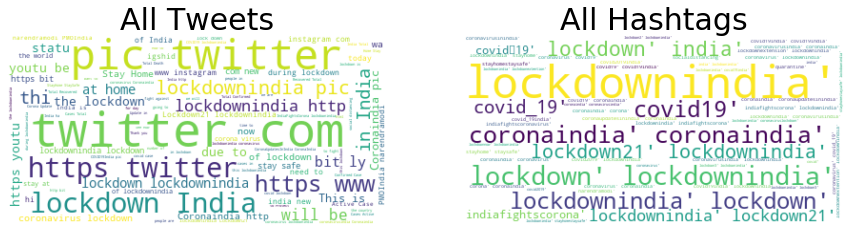

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tweet_All = " ".join(review for review in df.tweet)
hashtags_All = " ".join(review for review in df.hashtags)

fig, ax = plt.subplots(1, 2, figsize  = (15,15))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_tags_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hashtags_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_tags_ALL, interpolation='bilinear')
ax[1].set_title('All Hashtags',fontsize=30)
ax[1].axis('off')

1. We can clearly see the in the "All Tweets" there are many mentions of links(https) and other urls(bit ly) which can mbe removed.
2. In the "All Hashtags" data is pretty clean but has a scope of improvement.

### Cleaning of text data

Main part of the data are the "tweet" and the "hashtags", These two columns are textual data and unclean.
To get it ready for the sentiment analysis we need to perform few important steps:-
1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

In [10]:
# # # # Removing punctuation # # # #

# All the punctuation that has to be removed from the tweets and hashtags
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(3)

,date,time,tweet,retweets_count,likes_count,hashtags,Tweet_punct
0,19-05-2020,16:51:14,https://www.youtube.com/watch?v=-CRbO7ExO1k …\n\nTHE DRAMA FLICK presents LOCKDOWN 4 that comes...,0,0,"['#lockdownindia', '#lockdown', '#indiafightscovid19', '#lockdown4point0', '#guidelines']",httpswwwyoutubecomwatchvCRbOExOk …\n\nTHE DRAMA FLICK presents LOCKDOWN that comes in our live...
1,19-05-2020,16:50:44,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab unlocked down hi\n#lockdownindia\n#locldown4,0,0,"['#lockdownindia', '#locldown4']",Lockdown kanaam hi lockdown hai\nHai sab unlocked down hi\nlockdownindia\nlocldown
2,19-05-2020,16:48:29,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS AND ANXIETY\n https://sarasarvivek.blogspot.com/201...,0,0,"['#covid_19', '#covid_19sa', '#covid_19india', '#lockdown3', '#lockdownindia', '#lockdownlevel4'...",CORONA VIRUS THREAT\nHOW TO OVERCOME STRESS AND ANXIETY\n httpssarasarvivekblogspotcomhowtooverc...


In [12]:
# removing the urls from the Tweet_punc
df['cleanLinks'] = df['Tweet_punct'].str.replace('http\S+|www.\S+', '', case=False)
df['cleanLinks'] = df['cleanLinks'].replace('\n',' ', regex=True)
df.head(3)

,date,time,tweet,retweets_count,likes_count,hashtags,Tweet_punct,cleanLinks
0,19-05-2020,16:51:14,https://www.youtube.com/watch?v=-CRbO7ExO1k …\n\nTHE DRAMA FLICK presents LOCKDOWN 4 that comes...,0,0,"['#lockdownindia', '#lockdown', '#indiafightscovid19', '#lockdown4point0', '#guidelines']",httpswwwyoutubecomwatchvCRbOExOk …\n\nTHE DRAMA FLICK presents LOCKDOWN that comes in our live...,… THE DRAMA FLICK presents LOCKDOWN that comes in our lives with some relaxations and smiles...
1,19-05-2020,16:50:44,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab unlocked down hi\n#lockdownindia\n#locldown4,0,0,"['#lockdownindia', '#locldown4']",Lockdown kanaam hi lockdown hai\nHai sab unlocked down hi\nlockdownindia\nlocldown,Lockdown kanaam hi lockdown hai Hai sab unlocked down hi lockdownindia locldown
2,19-05-2020,16:48:29,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS AND ANXIETY\n https://sarasarvivek.blogspot.com/201...,0,0,"['#covid_19', '#covid_19sa', '#covid_19india', '#lockdown3', '#lockdownindia', '#lockdownlevel4'...",CORONA VIRUS THREAT\nHOW TO OVERCOME STRESS AND ANXIETY\n httpssarasarvivekblogspotcomhowtooverc...,CORONA VIRUS THREAT HOW TO OVERCOME STRESS AND ANXIETY … Yes we can make the most of the Lockd...


In [13]:
df['cleanLinks'][2]

'CORONA VIRUS THREAT HOW TO OVERCOME STRESS AND ANXIETY  \xa0… Yes we can make the most of the Lockdown period Covid CovidSA Covidindia Lockdown lockdownindia Lockdownlevel lockdowneffect pictwittercomVLYjmDbMNT'

\xa0 is actually non-breaking space in Latin1 (ISO 8859-1), also chr(160). You should replace it with a space.
When .encode('utf-8'), it will encode the unicode to utf-8, that means every unicode could be represented by 1 to 4 bytes. For this case, \xa0 is represented by 2 bytes \xc2\xa0.

In [14]:
# Checking the number of '\xa0...'
print('There total {} spaces in in Latin that has to converted'.format(df['cleanLinks'].str.count('\xa0...').sum()))

There total 15331 spaces in in Latin that has to converted


In [15]:
df['cleanLinks'] = df['cleanLinks'].str.split().str.join(' ')

In [16]:
df['cleanLinks'][2]

'CORONA VIRUS THREAT HOW TO OVERCOME STRESS AND ANXIETY … Yes we can make the most of the Lockdown period Covid CovidSA Covidindia Lockdown lockdownindia Lockdownlevel lockdowneffect pictwittercomVLYjmDbMNT'

In [17]:
# Checking the number of '\xa0...'
print('There total {} spaces in Latin that has to converted'.format(df['cleanLinks'].str.count('\xa0...').sum()))

There total 0 spaces in Latin that has to converted


### Tokenization

In [18]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

# Adding the tokenized text into the dataframe
df['Tweet_tokenized'] = df['cleanLinks'].apply(lambda x: tokenization(x.lower()))

### Remove Stopwords

In [19]:
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old'])

In [20]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(3)

,date,time,tweet,retweets_count,likes_count,hashtags,Tweet_punct,cleanLinks,Tweet_tokenized,Tweet_nonstop
0,19-05-2020,16:51:14,https://www.youtube.com/watch?v=-CRbO7ExO1k …\n\nTHE DRAMA FLICK presents LOCKDOWN 4 that comes...,0,0,"['#lockdownindia', '#lockdown', '#indiafightscovid19', '#lockdown4point0', '#guidelines']",httpswwwyoutubecomwatchvCRbOExOk …\n\nTHE DRAMA FLICK presents LOCKDOWN that comes in our live...,… THE DRAMA FLICK presents LOCKDOWN that comes in our lives with some relaxations and smiles Let...,"[, the, drama, flick, presents, lockdown, that, comes, in, our, lives, with, some, relaxations, ...","[, drama, flick, presents, lockdown, comes, lives, relaxations, smiles, lets, keep, spirits, hig..."
1,19-05-2020,16:50:44,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab unlocked down hi\n#lockdownindia\n#locldown4,0,0,"['#lockdownindia', '#locldown4']",Lockdown kanaam hi lockdown hai\nHai sab unlocked down hi\nlockdownindia\nlocldown,Lockdown kanaam hi lockdown hai Hai sab unlocked down hi lockdownindia locldown,"[lockdown, kanaam, hi, lockdown, hai, hai, sab, unlocked, down, hi, lockdownindia, locldown]","[lockdown, kanaam, hi, lockdown, hai, hai, sab, unlocked, hi, lockdownindia, locldown]"
2,19-05-2020,16:48:29,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS AND ANXIETY\n https://sarasarvivek.blogspot.com/201...,0,0,"['#covid_19', '#covid_19sa', '#covid_19india', '#lockdown3', '#lockdownindia', '#lockdownlevel4'...",CORONA VIRUS THREAT\nHOW TO OVERCOME STRESS AND ANXIETY\n httpssarasarvivekblogspotcomhowtooverc...,CORONA VIRUS THREAT HOW TO OVERCOME STRESS AND ANXIETY … Yes we can make the most of the Lockdow...,"[corona, virus, threat, how, to, overcome, stress, and, anxiety, yes, we, can, make, the, most, ...","[corona, virus, threat, overcome, stress, anxiety, yes, make, lockdown, period, covid, covidsa, ..."
3,19-05-2020,16:47:36,Could you please\n\n#lockdownindia\n@Bhuvan_Bam\n@ashchanchlani\n@lakshayhere\n@CarryMinati\n#Ro...,0,1,"['#lockdownindia', '#roastchallenge', '#journalists', '#socialmediastars', '#youtubevstiktok']",Could you please\n\nlockdownindia\nBhuvanBam\nashchanchlani\nlakshayhere\nCarryMinati\nRoastChal...,Could you please lockdownindia BhuvanBam ashchanchlani lakshayhere CarryMinati RoastChallenge Th...,"[could, you, please, lockdownindia, bhuvanbam, ashchanchlani, lakshayhere, carryminati, roastcha...","[could, please, lockdownindia, bhuvanbam, ashchanchlani, lakshayhere, carryminati, roastchalleng..."
4,19-05-2020,16:47:29,"In fight with #COVID19, You are the best Doctor for yourself. No degree required. Common sense &...",0,0,"['#covid19', '#coronavirus', '#patiencechallenge', '#covid_19', '#covid_19india', '#indiafightsc...",In fight with COVID You are the best Doctor for yourself No degree required Common sense necess...,In fight with COVID You are the best Doctor for yourself No degree required Common sense necessa...,"[in, fight, with, covid, you, are, the, best, doctor, for, yourself, no, degree, required, commo...","[fight, covid, best, doctor, degree, required, common, sense, necessary, precautions, good, enou..."
5,19-05-2020,16:46:43,#TOP 5 #place in #india to visit after this #lockdownindia\n https://bit.ly/2WJCmwb \n#IndiaFigh...,0,0,"['#top', '#place', '#india', '#lockdownindia', '#indiafightscoronavirus', '#lock', '#travel', '#...",TOP place in india to visit after this lockdownindia\n httpsbitlyWJCmwb \nIndiaFightsCoronaviru...,TOP place in india to visit after this lockdownindia IndiaFightsCoronavirus lock travel travelbl...,"[top, place, in, india, to, visit, after, this, lockdownindia, indiafightscoronavirus, lock, tra...","[top, place, india, visit, lockdownindia, indiafightscoronavirus, lock, travel, travelblogger, t..."
6,19-05-2020,16:46:02,(Conti.) So just wanted to bring your attention to this.. @GooglePay @Paytmcare @Paytm @UPI_NPCI...,0,0,['#lockdownindia'],Conti So just wanted to bring your attention to this GooglePay Paytmcare Paytm UPINPCI NPCIBHIM ...,Conti So

### Lammitization

In [22]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# Adding lemmatized text to the dataframe
df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ysanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Working with the hastags

In [23]:
# As we need only the hastags text we don't really need the pound(#) symbol
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# making a seperate list of hashtags 
tags = hashtag_extract(df['hashtags'])

In [25]:
# We still have a nested lists of tags
# We need to convert it into a single list so we can count the occurence of each tag
tags

[['lockdownindia',
  'lockdown',
  'indiafightscovid19',
  'lockdown4point0',
  'guidelines'],
 ['lockdownindia', 'locldown4'],
 ['covid_19',
  'covid_19sa',
  'covid_19india',
  'lockdown3',
  'lockdownindia',
  'lockdownlevel4',
  'lockdowneffect'],
 ['lockdownindia',
  'roastchallenge',
  'journalists',
  'socialmediastars',
  'youtubevstiktok'],
 ['covid19',
  'coronavirus',
  'patiencechallenge',
  'covid_19',
  'covid_19india',
  'indiafightscorona',
  'lockdownindia'],
 ['top',
  'place',
  'india',
  'lockdownindia',
  'indiafightscoronavirus',
  'lock',
  'travel',
  'travelblogger',
  'traveltuesday',
  'travelling',
  'tourismmustsurvive',
  'tourism',
  'tourist',
  'indiafightscorona',
  'travelphotography',
  'travelsafely',
  'travelexpert',
  'blogger'],
 ['lockdownindia'],
 ['emergency',
  'gorakhpur',
  'vadodara',
  'up',
  'gujaratgovernment',
  'lockdownindia'],
 ['death', 'starvation', 'lockdown', 'lockdownindia'],
 ['lockdownindia', 'lockdown4point0', 'pointlessl

In [26]:
# Empty list to store the unnested tags
chained = []
while tags:        
    chained.extend(tags.pop(0))        # moving each tag from the 'tags' list to the 'chained' list
    
# Here chained is the single list

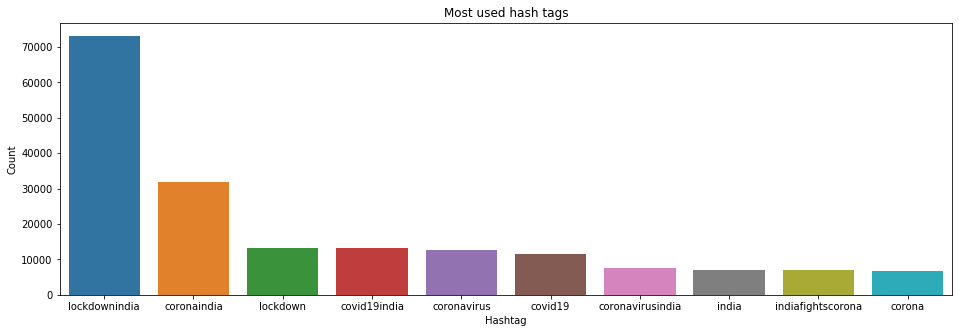

In [27]:
a = nltk.FreqDist(chained)                                 # Creating a frequesncy distribution of Chained list
d = pd.DataFrame({'Hashtag': list(a.keys()),               # converting into a dataframe to store the tags and their counts
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10)                    # Tags with 10 highest  frequencies

# Plotting the count
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Most used hash tags')

plt.show()

It can be seen that citizen of India are really talking about the LOCKDOWN more than the corona virus.

## Lets perform sentiment analysis on the tweets

In [28]:
#nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()


i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores

sentences = df['cleanLinks'] 
while (i<len(sentences)):

    k = analyser.polarity_scores(sentences.iloc[i])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

Wall time: 0 ns


124384

In [29]:
df['VADER score'] = compval1

### Assigning categorical values to the sentiment

In [30]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

sentences = df['VADER score']

while(i<len(sentences)):
    
    if ((sentences.iloc[i] >= 0.7)):                         #If VADER score is more than 0.7 then it is a positive sentiment
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i] > 0) & (sentences.iloc[i] < 0.7)):
        predicted_value.append('neutral')                   #If VADER score is between 0 and 0.7 then it is a neutral sentiment
        i = i+1
    elif ((sentences.iloc[i] <= 0)):
        predicted_value.append('negative')                  #If VADER score is less than 0.0 then it is a negative sentiment
        i = i+1
        

        
# Adding the data to the dataset
df['predicted sentiment'] = predicted_value

### Working with the dates

Now we will look at the dates and relate it with the tweets and hastags as the dates will help us to understand the before and after conditions of Lockdown.

1. Janta Curfew = 22 MARCH 2020 for 1 day
2. 1st Lockdown = 25 March 2020 for 21 days till 14 APRIL 2020
3. 2nd Lockdown = 15 APRIL 2020 till 3 MAY 2020
4. 3rd Lockdown = 4 MAY 2020 till 17 May 2020
5. 4th Lockdown = 18 MAY 2020 till 31 MAY 2020
6. 5th Lockdown = 1 JUNE 2020 till 30 JUNE 2020

In [31]:
# we need to convert the dates into date time format so that we can work with it
df['date'] = df['date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 124384 non-null  datetime64[ns]
 1   time                 124384 non-null  object        
 2   tweet                124384 non-null  object        
 3   retweets_count       124384 non-null  int64         
 4   likes_count          124384 non-null  int64         
 5   hashtags             124384 non-null  object        
 6   Tweet_punct          124384 non-null  object        
 7   cleanLinks           124384 non-null  object        
 8   Tweet_tokenized      124384 non-null  object        
 9   Tweet_nonstop        124384 non-null  object        
 10  Tweet_stemmed        124384 non-null  object        
 11  Tweet_lemmatized     124384 non-null  object        
 12  VADER score          124384 non-null  float64       
 13  predicted sent

In [32]:
# Let's create dataframe for all the lockdowns
janta_cur = df[df['date'] == '2020-03-22']
lockdown1 = df[(df['date'] >= '2020-03-25') & (df['date'] <= '2020-04-14')]
lockdown2 = df[(df['date'] >= '2020-04-15') & (df['date'] <= '2020-05-03')]
lockdown3 = df[df['date'] >= '2020-05-04']

## Exploratory Data Analysis

In [64]:
# Creating an object to plot differnt plots we will be needing

class plot:
    
    # function to count number of tweets for each sentiment
    def count_sentiments(self,data,x_col):
        sns.countplot(data = data, x = x_col)
        
    # function to plot the most used tags
    def most_used_tags(hashtag_column,name_of_plot):

        a = nltk.FreqDist(hashtag_column)                                 # Creating a frequesncy distribution of Chained list
        d = pd.DataFrame({'Hashtag': list(a.keys()),               # converting into a dataframe to store the tags and their counts
                          'Count': list(a.values())})
        # selecting top 3 most frequent hashtags     
        d = d.nlargest(columns="Count", n = 3)                    # Tags with 3 highest  frequencies

        # Plotting the count
        plt.figure(figsize=(16,5))
        ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
        ax.set(ylabel = 'Count')
        ax.set_title('Most used hash tags on {}'.format(name_of_plot))

        plt.show()
        
    # function to count number of likes for each sentiment
    def count_likes_retweets(self,data):
        g = sns.PairGrid(data = data, x_vars=["likes_count","retweets_count"],
                         y_vars=["predicted sentiment"], height=6)
        g.map(sns.barplot)
        g.fig.suptitle('Count of likes and retweets for each sentiment', y = 1.05)

p = plot()   

### Janta Curfew 

Janta Curfew held on 22nd March 2020 without any indication on the  upcoming lockdowns but people were aware of it due to similar actions being taken in other countries.

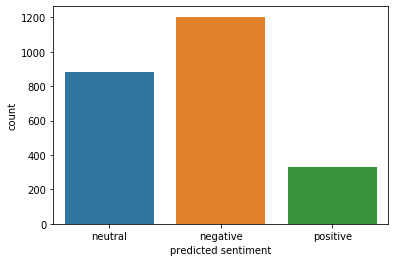

In [65]:
# Lets plot the sentiment analysis performed on the Janta Curfew
p.count_sentiments(janta_cur,'predicted sentiment')

#### Conclusion
- Negative sentiment is a lot higher than the positivev sentiment.
- Neutral sentiment can be high due to presence of questions regarding the curfew.
- Due to sudden announcement of lockdown positive sentiments are pretty low.

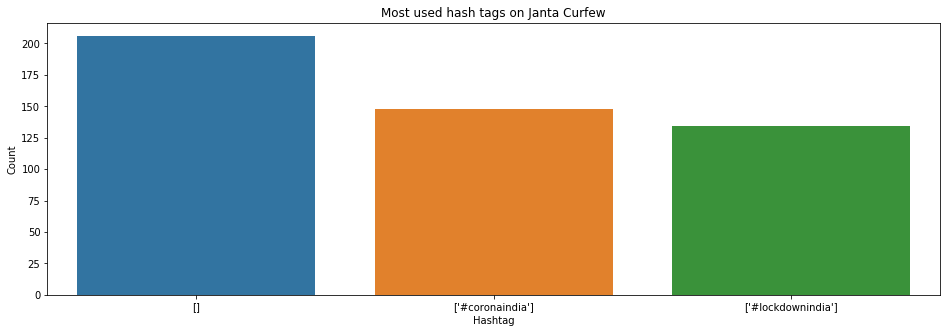

In [35]:
# plotting the frequency of hastags
most_used_tags(janta_cur['hashtags'],name_of_plot = 'Janta Curfew')

The highest number of tweets doesn't have tags hence it is being shown like [].
As 22 March were the days where only few cases were seen throughout the country, #coronindia was trending and hance the speculation of lockdown.

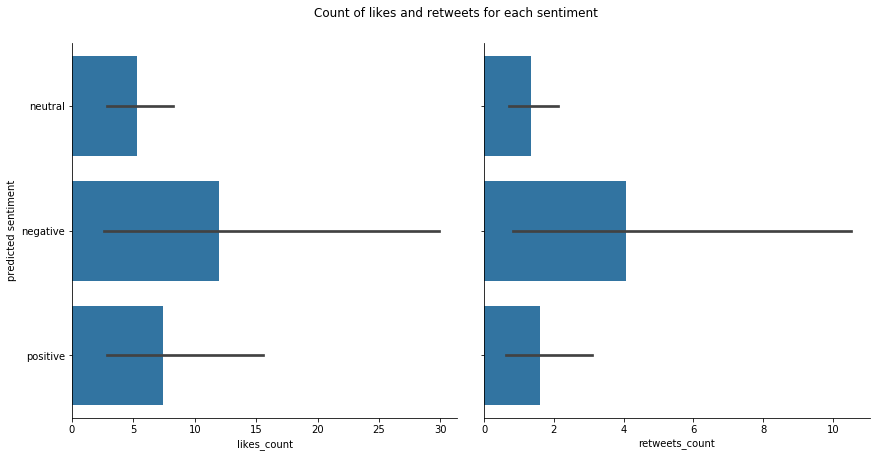

In [66]:
# Looking at the total likes and retweets
p.count_likes_retweets(janta_cur)

Negative tweets are obviously getting more likes and retweets as sudden curfew has triggered lots of people who had similar sentiments.

(-0.5, 399.5, 199.5, -0.5)

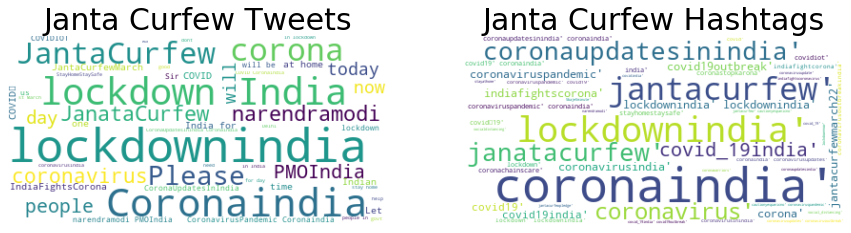

In [75]:
tweet_All = " ".join(review for review in janta_cur.cleanLinks)
hashtags_All = " ".join(review for review in janta_cur.hashtags)

fig, ax = plt.subplots(1, 2, figsize  = (15,15))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_All)
wordcloud_tags_ALL = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(hashtags_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('Janta Curfew Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_tags_ALL, interpolation='bilinear')
ax[1].set_title('Janta Curfew Hashtags',fontsize=30)
ax[1].axis('off')

We can the use and mentions of 'Janta curfew', 'lockdownindia' and few mentions of PMOIndia.

### Lockdown 1

First lockdown held on 25 March 2020 for 21 days till 14 APRIL 2020.

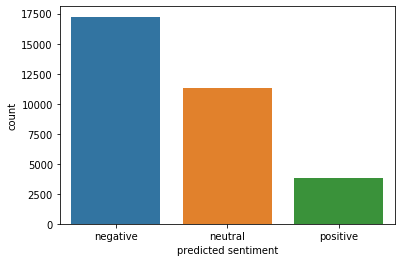

In [76]:
# Lets plot the sentiment analysis performed on the Janta Curfew
p.count_sentiments(lockdown1,'predicted sentiment')

In this 28 days lockdown period negative sentiments are very large compared to the positive sentiments.
Still the number of neutral sentiments are higher

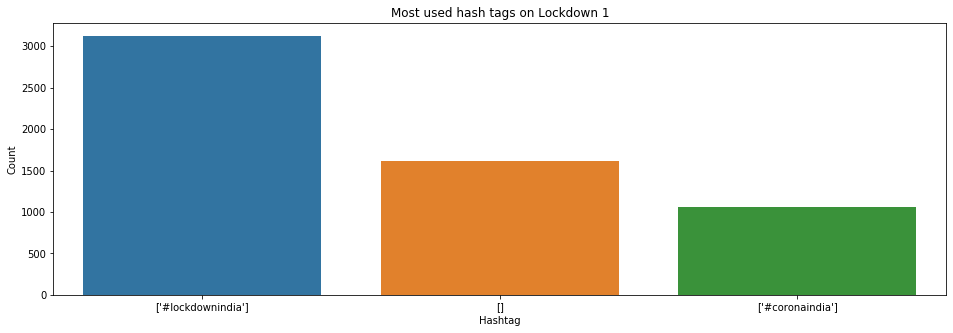

In [77]:
# plotting the frequency of hastags
most_used_tags(lockdown1['hashtags'],name_of_plot = 'Lockdown 1')

- As India enters into the first phase of lockdown the use of #lockdownindia incresed.
- Meanwhile Coronaindia is on 3rd, may be because even if the corona virus is the cause, lockdown is taking a greater toll on the sentiments of the indian citizen.

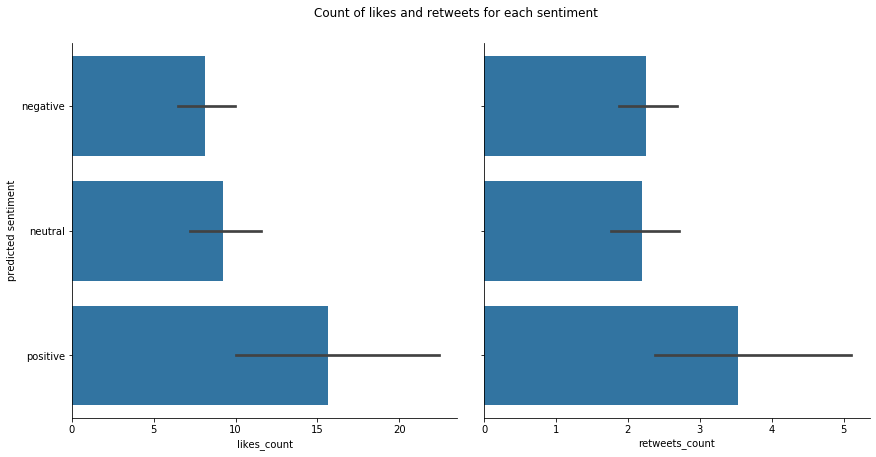

In [79]:
# Looking at the total likes and retweets
p.count_likes_retweets(lockdown1)

- It can be confusing as the Negative sentiments are way higher than the positive sentiments but the number of interactions with the positive tweets.(Not considering ANY POLITICAL BIAS)
- Number of interaction with the neutral tweets are closer to that of negative tweets.

(-0.5, 399.5, 199.5, -0.5)

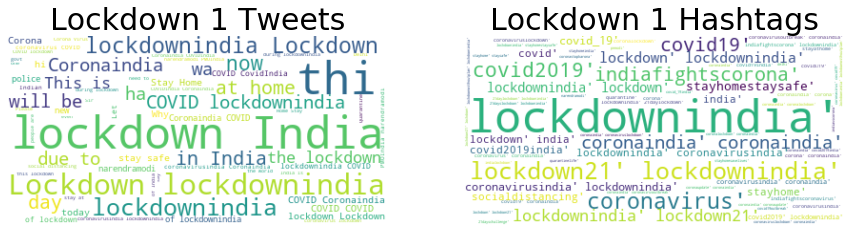

In [87]:
tweet_All = " ".join(review for review in lockdown1.cleanLinks)
hashtags_All = " ".join(review for review in lockdown1.hashtags)

fig, ax = plt.subplots(1, 2, figsize  = (15,15))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_tags_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hashtags_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('Lockdown 1 Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_tags_ALL, interpolation='bilinear')
ax[1].set_title('Lockdown 1 Hashtags',fontsize=30)
ax[1].axis('off')

- With higher number of interactions with positive sentiments and number of "stayhome","athome","staysafe" words and hastags  in the tweets hints towards the citizen understanding the need and importance of this lockdown.

### Lockdown 2

The second lockdown helf for 18 days from 15 APRIL 2020 till 3 MAY 2020

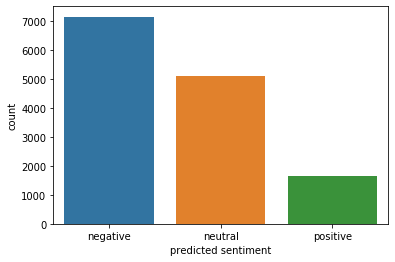

In [80]:
# Lets plot the sentiment analysis performed on the Janta Curfew
p.count_sentiments(lockdown2,'predicted sentiment')

Number of citizens with negative tweets are still very high compared to the number of positive tweets.

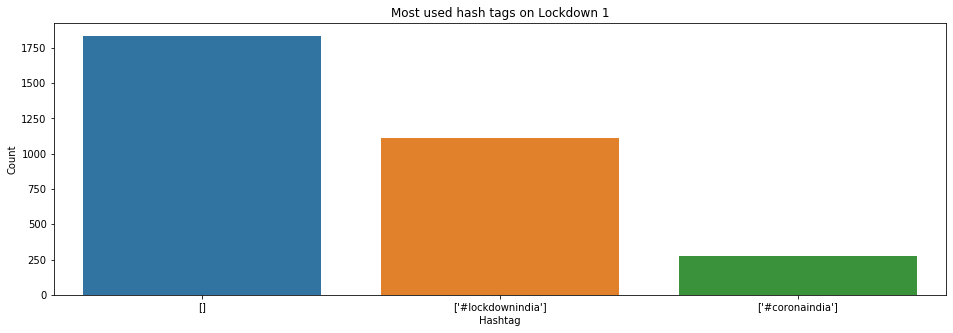

In [82]:
# plotting the frequency of hastags
most_used_tags(lockdown2['hashtags'],name_of_plot = 'Lockdown 1')

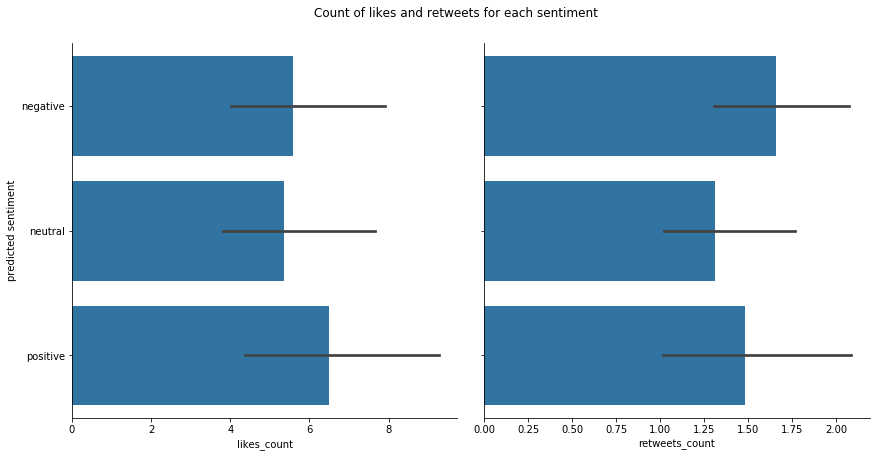

In [84]:
# Looking at the total likes and retweets
p.count_likes_retweets(lockdown2)

Number interaction with negative interacts a lot more and can be considered more than that of positive tweets. The reason can be the walking of migrant workers towards their native places due to no job and money.

(-0.5, 399.5, 199.5, -0.5)

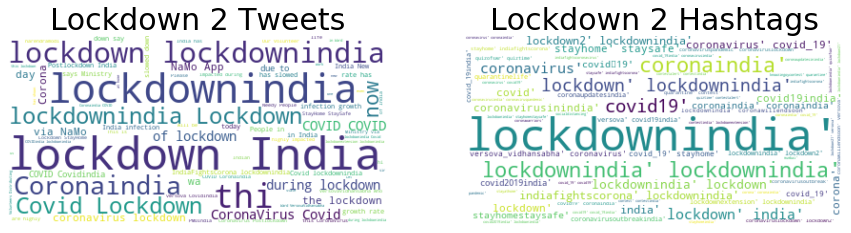

In [88]:
tweet_All = " ".join(review for review in lockdown2.cleanLinks)
hashtags_All = " ".join(review for review in lockdown2.hashtags)

fig, ax = plt.subplots(1, 2, figsize  = (15,15))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_tags_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hashtags_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('Lockdown 2 Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_tags_ALL, interpolation='bilinear')
ax[1].set_title('Lockdown 2 Hashtags',fontsize=30)
ax[1].axis('off')

From number of interactions and the word cloud it can be concluded that people are having mixed sentiments regarding the lockdown as the numbe rof patients continuosly increased which made them realized the importance of lockdown and hence the positive sentiments while the loss of work and the situation of migrants led to the negative sentiments.

### Lockdown 3

Lockdown 3 strarted on 4 MAY 2020 till 17 May 2020

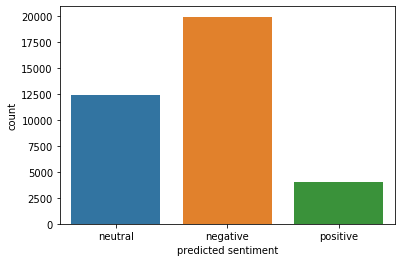

In [89]:
# Lets plot the sentiment analysis performed on the Janta Curfew
p.count_sentiments(lockdown3,'predicted sentiment')

Number of Negative sentiment tweets are higher may be due to the sudden spikes in the cases of coronavirus.

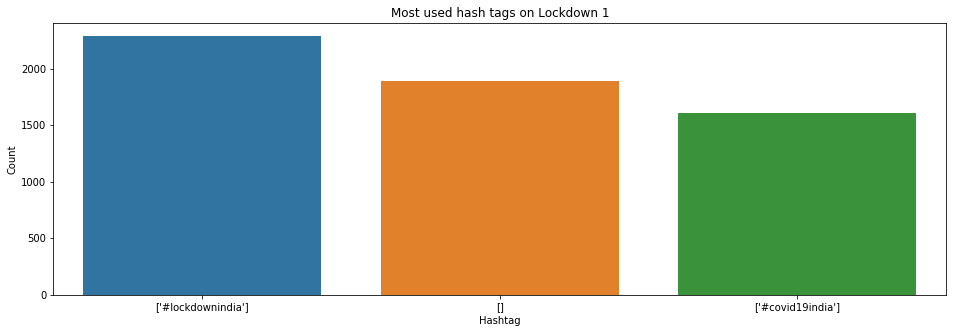

In [90]:
# plotting the frequency of hastags
most_used_tags(lockdown3['hashtags'],name_of_plot = 'Lockdown 1')

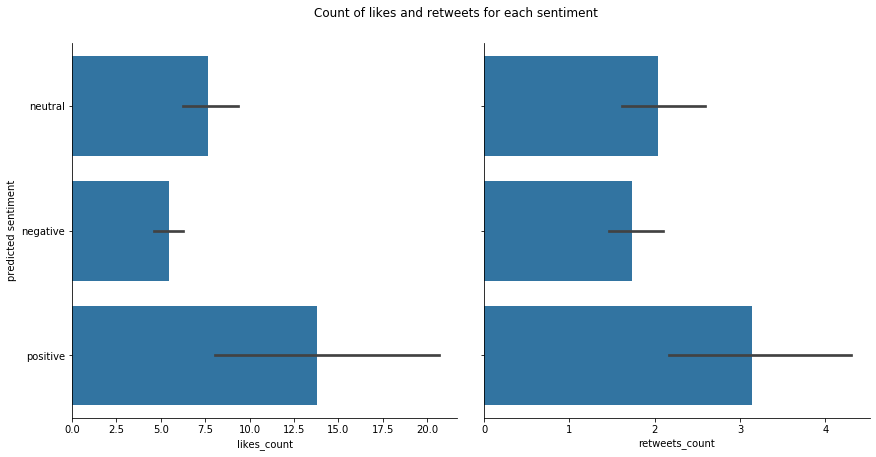

In [91]:
# Looking at the total likes and retweets
p.count_likes_retweets(lockdown3)

Interaction with the positive sentiment tweet has increased again as the news of reopening few things started surfacing the news and social media.

(-0.5, 399.5, 199.5, -0.5)

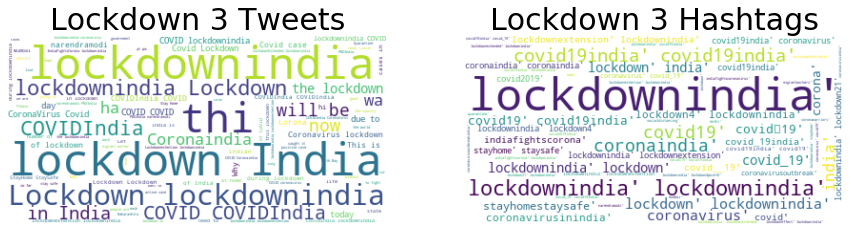

In [92]:
tweet_All = " ".join(review for review in lockdown3.cleanLinks)
hashtags_All = " ".join(review for review in lockdown3.hashtags)

fig, ax = plt.subplots(1, 2, figsize  = (15,15))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_tags_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hashtags_All)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('Lockdown 3 Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_tags_ALL, interpolation='bilinear')
ax[1].set_title('Lockdown 3 Hashtags',fontsize=30)
ax[1].axis('off')

#### Comparison with each other